# Electric Vehicles Market Size Analysis using Python

## Import required libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

## Load and read the data

In [65]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [66]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

## Check if there is null data

In [67]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

## Remove the null data

In [68]:
ev_data = ev_data.dropna()

In [69]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

# Step 1: EV Adoption Over Time

## Visualize the historical growth trend of EV registrations

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


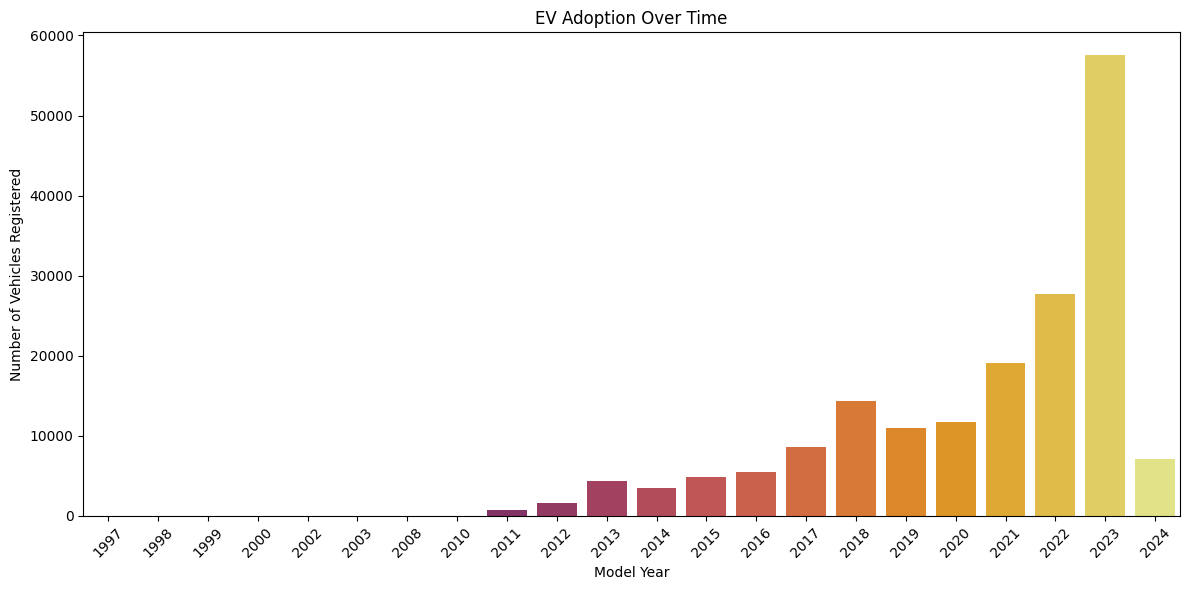

In [70]:
# EV Adoption Over Time

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="inferno")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Based on the above chart, we can find that more electric vehicles (EVs) are being adopted over time. There was a noticeable increase starting around 2016, where EV registrations started to rise more quickly. In 2023, there was a big jump in registered EVs, reaching the highest point on the graph, showing a peak in EV adoption.

# Step 2: Forecast future EV registrations based on historical trends

### Calculate the number of EVs registered every year

In [71]:
ev_registration_counts = ev_data['Model Year'].value_counts().reset_index()
ev_registration_counts.columns = ['Model Year', 'Registration']
ev_registration_counts


,Model Year,Registration
0,2023,57519
1,2022,27708
2,2021,19063
3,2018,14286
4,2020,11740
5,2019,10913
6,2017,8534
7,2024,7072
8,2016,5469
9,2015,4826


### The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

In [72]:
filtered_counts = ev_registration_counts[ev_registration_counts['Model Year'] != 2024]
filtered_counts

,Model Year,Registration
0,2023,57519
1,2022,27708
2,2021,19063
3,2018,14286
4,2020,11740
5,2019,10913
6,2017,8534
8,2016,5469
9,2015,4826
10,2013,4399


### Create a Linear Regression model to predict the number of registration in the upcoming year

In [73]:
# Setting up independent and dependent variables
X = filtered_counts[['Model Year']] 
y = filtered_counts['Registration']  

In [74]:
# Training the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [75]:
# Evaluating the model (comparing predictions with actual data)
y_pred = model.predict(X)
mse = np.mean((y_pred - y) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 96318481.32783735


In [76]:
# Using the trained model to predict future registrations
future_years = [[2024], [2025], [2026]]  # Future years
future_registration = model.predict(future_years)
print("Predicted Registration for Future Years:", future_registration)

Predicted Registration for Future Years: [21732.57375523 22807.69799907 23882.8222429 ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


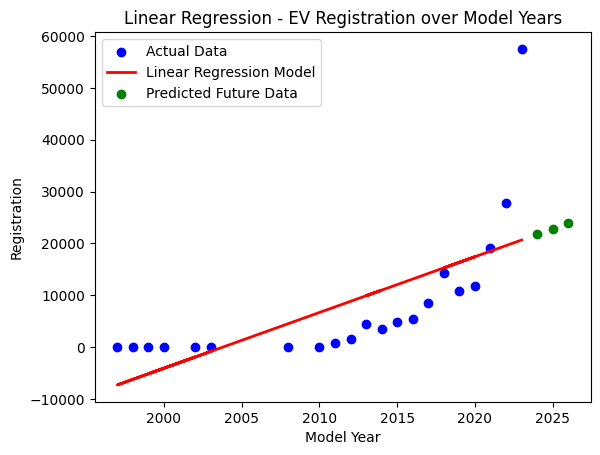

In [77]:
# Visualizing the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Model')
plt.scatter(future_years, future_registration, color='green', label='Predicted Future Data')
plt.title('Linear Regression - EV Registration over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Registration')
plt.legend()
plt.show()

# Step 3: Analyze the distribution of EV registrations across different models, makes, and geographical regions

### look into the most popular manufacturers and then drill down into the most popular models within those manufacturers

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


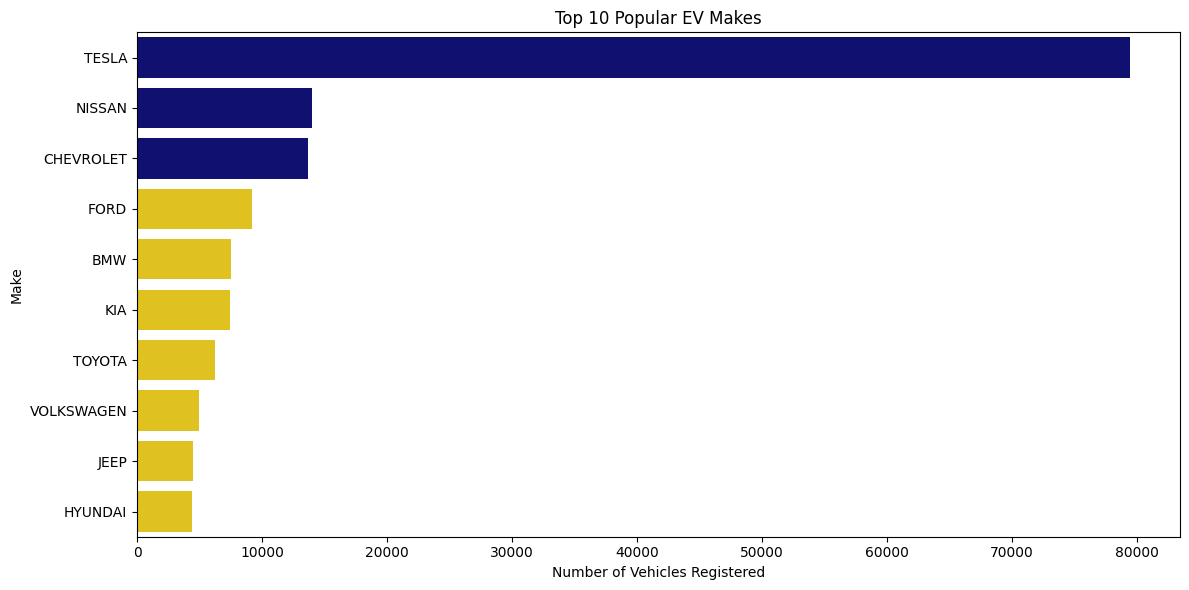

In [99]:
make_dist = ev_data['Make'].value_counts().head(10)

# find the top 3 EV makers in the US
plt.figure(figsize=(12, 6))
colors = ['navy' if i < 3 else 'gold' for i in range(len(make_dist))]
sns.barplot(x=make_dist.values, y=make_dist.index, palette=colors)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

* TESLA holds the highest number of registered vehicles, followed by NISSAN and CHEVROLET, though both trail behind significantly

### Drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level

In [108]:
top3_makes = make_dist.head(3).index

# Filter the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top3_makes)]

# Analyze the popularity of EV models within these top manufacturers
model_dist_top3_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

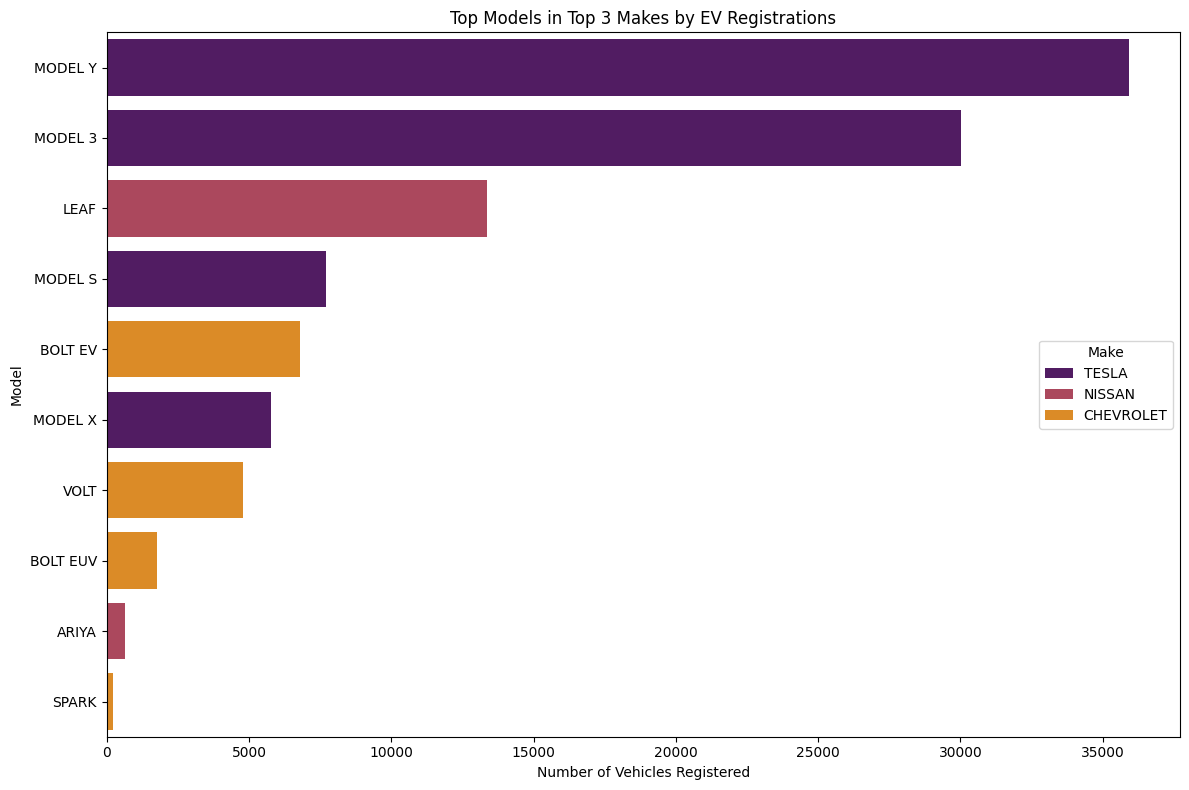

In [109]:
# Visualize the top 10 models across these manufacturers

top_models = model_dist_top3_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', data=top_models, hue='Make', palette="inferno", dodge=False)
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()


* TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
* NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
* TESLA’s MODEL S and MODEL X also have a significant number of registrations.
* CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
* NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown. 

### Select the top 3 counties based on EV registrations

In [110]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

###  Analyze the distribution of EVs within the cities of those counties

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

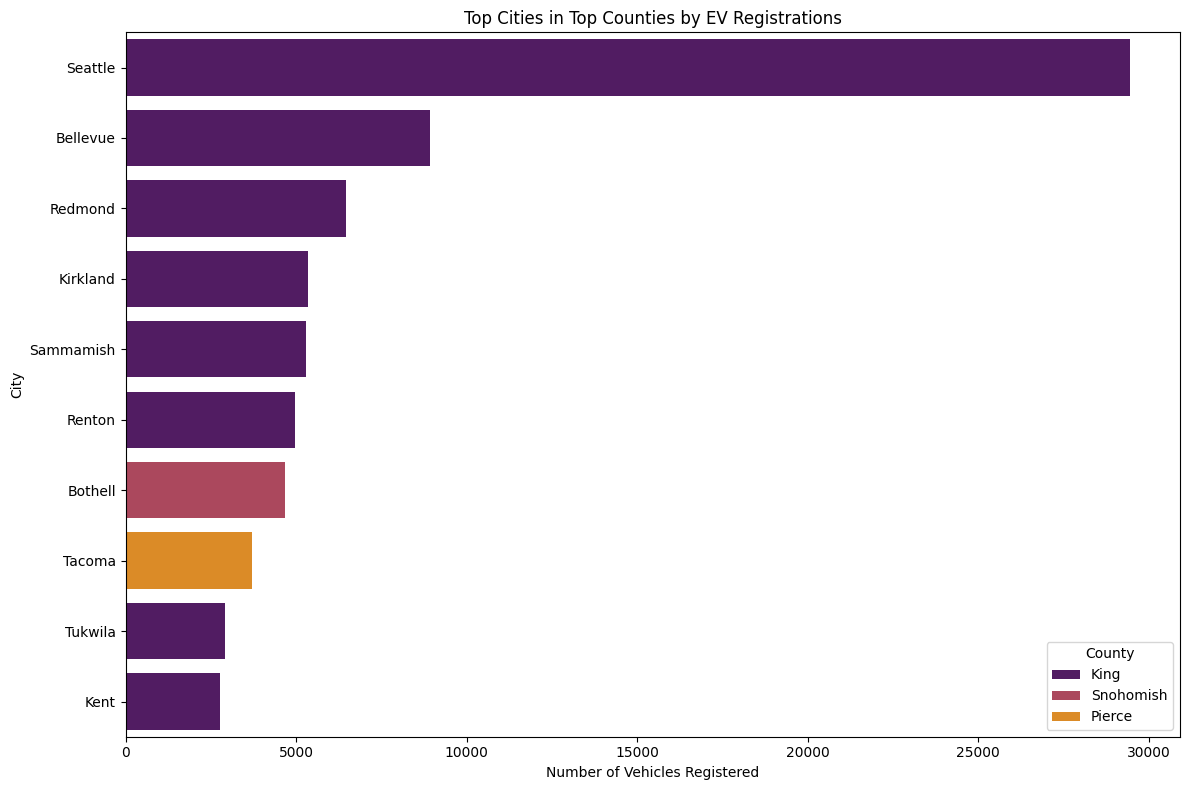

In [113]:
# Filter the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analze the distribution of EVs within the cities of these top counties
city_dist_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = city_dist_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="inferno", dodge=False)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

* Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
* Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
* Cities in Snohomish County, such as Kirkland and Sammamish, show moderate EV registrations.
* Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
* The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
* Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.


# Step 4: Estimate the market size and growth potential of the EV market for upcoming years

### Calculate the Compound Annual Growth Rate(CAGR) between a recent year with complete data(2023) and an earlier year to project the 2024 figures.


In [136]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

forecasted_evs


{2024: 79079.20682850912,
 2025: 119653.95975054416,
 2026: 181047.2140297609,
 2027: 273940.735235793,
 2028: 414496.9963978071,
 2029: 627171.2743813773}

### Visualize the estimated market size 

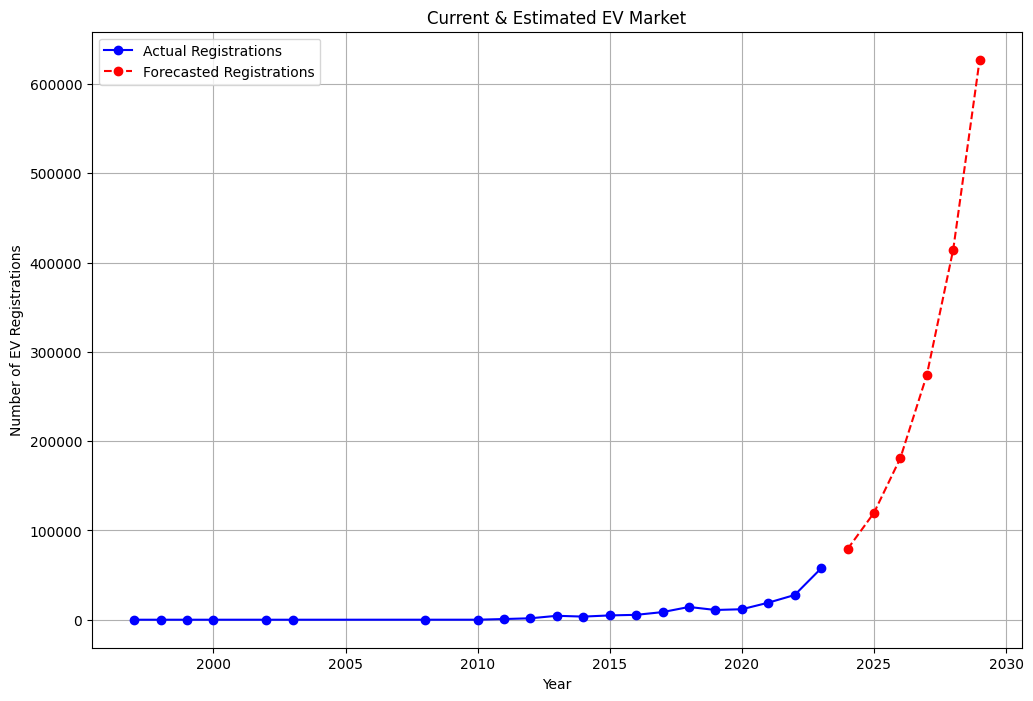

In [135]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

* The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
* The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.


# Step 5: Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation